# Libraries for Neural Networks - Pybrain 2

In [1]:
!pip install https://github.com/pybrain/pybrain/archive/0.3.3.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 1.5 MB 2.7 MB/s
  Created wheel for PyBrain: filename=PyBrain-0.3.1-py3-none-any.whl size=468230 sha256=bc66fc675956647cac7091c3ec476e259274bbca6b2012f2ac2fd1580a706379
  Stored in directory: /tmp/pip-ephem-wheel-cache-6cccinr5/wheels/c7/56/4e/56d3dbbc48a90306f3ac2cc356de1d6d327090889fc0b29c6f
Successfully built PyBrain


In [3]:
import pybrain

In [4]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer

In [5]:
network = buildNetwork(2, 3, 1, outclass = SigmoidLayer, hiddenclass = SigmoidLayer, bias = False)

In [6]:
network

<FeedForwardNetwork 'FeedForwardNetwork-5'>

In [7]:
network['in']

<LinearLayer 'in'>

In [8]:
network['hidden0']

<SigmoidLayer 'hidden0'>

In [9]:
network['out']

<SigmoidLayer 'out'>

In [10]:
network['bias']

In [11]:
dataset = SupervisedDataSet(2, 1)
dataset.addSample((0,0), (0,))
dataset.addSample((0,1), (1,))
dataset.addSample((1,0), (1,))
dataset.addSample((1,1), (0,))

In [12]:
dataset['input']

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [13]:
dataset['target']

array([[0.],
       [1.],
       [1.],
       [0.]])

In [14]:
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.5)

In [15]:
epochs = 30000
error = []
for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(error_average))
    error.append(error_average)

Epoch: 1 Error: 0.13046699958667404
Epoch: 1001 Error: 0.008224086344474125
Epoch: 2001 Error: 0.0029905338646010887
Epoch: 3001 Error: 0.0018130958127619422
Epoch: 4001 Error: 0.0012969715799776675
Epoch: 5001 Error: 0.0010079475775541073
Epoch: 6001 Error: 0.000823446513104793
Epoch: 7001 Error: 0.0006955805983928006
Epoch: 8001 Error: 0.0006018072130350531
Epoch: 9001 Error: 0.000530132943783129
Epoch: 10001 Error: 0.00047359039698161855
Epoch: 11001 Error: 0.00042785973395284197
Epoch: 12001 Error: 0.00039011932399236464
Epoch: 13001 Error: 0.0003584495365660207
Epoch: 14001 Error: 0.00033149917520096785
Epoch: 15001 Error: 0.0003082894808718061
Epoch: 16001 Error: 0.0002880946786739606
Epoch: 17001 Error: 0.0002703647962706042
Epoch: 18001 Error: 0.00025467589821555103
Epoch: 19001 Error: 0.0002406957784319204
Epoch: 20001 Error: 0.00022816050452731737
Epoch: 21001 Error: 0.0002168577718407028
Epoch: 22001 Error: 0.00020661478948704365
Epoch: 23001 Error: 0.00019728966946939167
Ep

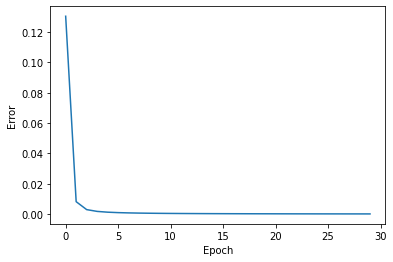

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)

In [17]:
network.params

array([ -4.25157567,   6.72278672,   5.57193432,   5.59638161,
         6.52773501,  -4.18251292, -11.58432067,  15.93648258,
       -11.59720616])

In [18]:
network.activate([0,0])

array([0.02602008])

In [19]:
network.activate([0,1])

array([0.98421591])

In [20]:
network.activate([1,0])

array([0.98422095])

In [21]:
network.activate([1,1])

array([0.00482694])